In [ ]:
%pip install plotly

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
vendas = pd.read_excel('varejo.xlsx')

In [ ]:
vendas[vendas['Preço'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [ ]:
vendas['estado'].fillna('MS',inplace=True)
vendas['Preço'].fillna(vendas['Preço'].median(), inplace=True)

In [ ]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,905.176212,908.619823
std,1057.861244,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,531.240000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
vendas[vendas.duplicated()] # = 0

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log


In [ ]:
if vendas.duplicated().any():
   vendas.drop_duplicates(inplace=True)

In [ ]:
vendas_correto = vendas.query('Preço < Preço_com_frete')

In [ ]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [ ]:
vendas_correto['Preço_bruto'] = vendas_correto['Preço']

<ipython-input-12-f13b37dc47bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Preço_bruto'] = vendas_correto['Preço']


In [ ]:
vendas_correto.drop('Preço', axis=1, inplace=True)

<ipython-input-13-f1a7b0a23628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto.drop('Preço', axis=1, inplace=True)


In [ ]:
vendas_correto['Desconto'] = 10

<ipython-input-14-7a365c9430c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Desconto'] = 10


In [ ]:
vendas_correto['Preço_liquido'] = vendas_correto['Preço_com_frete'] - vendas_correto['Desconto']

<ipython-input-15-f1f605d978ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Preço_liquido'] = vendas_correto['Preço_com_frete'] - vendas_correto['Desconto']


In [ ]:
vendas_correto['Porcentagem_desconto'] = (vendas_correto['Desconto'] / vendas_correto['Preço_com_frete']) * 100

<ipython-input-16-e1626b71526b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Porcentagem_desconto'] = (vendas_correto['Desconto'] / vendas_correto['Preço_com_frete']) * 100


In [ ]:
vendas_correto['Porcentagem_desconto'] = vendas_correto['Porcentagem_desconto'].apply(lambda x: f'{x:.2f}%')

<ipython-input-17-9554e916bdc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Porcentagem_desconto'] = vendas_correto['Porcentagem_desconto'].apply(lambda x: f'{x:.2f}%')


In [ ]:
vendas_correto[['Preço_liquido', 'Preço_bruto', 'Preço_com_frete', 'Desconto']].corr()

,Preço_liquido,Preço_bruto,Preço_com_frete,Desconto
Preço_liquido,1.000000,0.985302,1.000000,NaN
Preço_bruto,0.985302,1.000000,0.985302,NaN
Preço_com_frete,1.000000,0.985302,1.000000,NaN
Desconto,NaN,NaN,NaN,NaN


<Axes: >

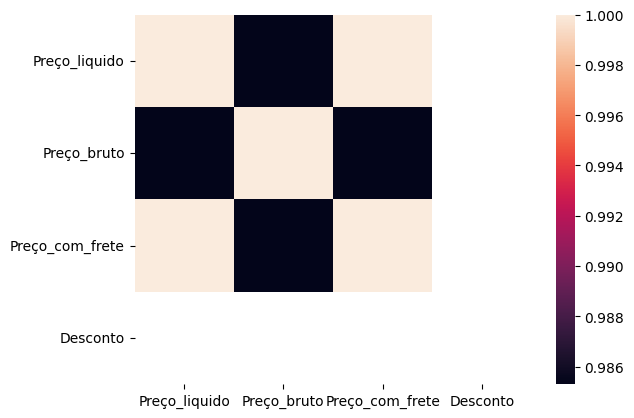

In [ ]:
sns.heatmap(vendas_correto[['Preço_liquido', 'Preço_bruto', 'Preço_com_frete', 'Desconto']].corr())

<Axes: xlabel='Preço_liquido', ylabel='Preço_bruto'>

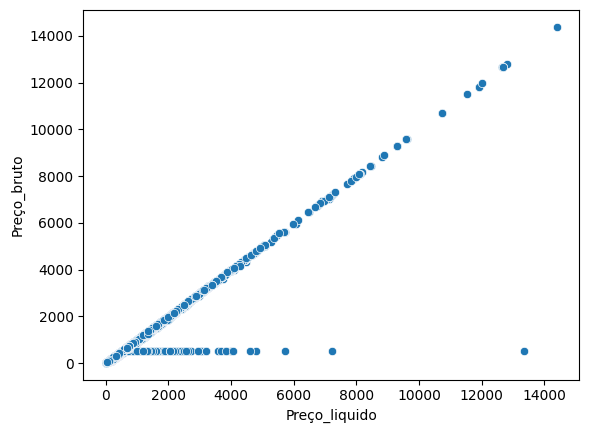

In [ ]:
sns.scatterplot(vendas_correto, x='Preço_liquido', y='Preço_bruto')

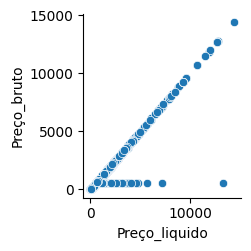

In [ ]:
sns.pairplot(vendas_correto, x_vars='Preço_liquido', y_vars='Preço_bruto')

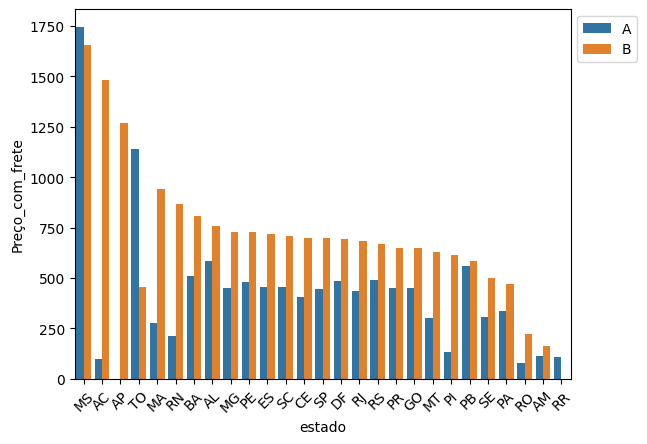

In [ ]:
agg_estado_pfm = vendas_correto.groupby(['estado','bandeira']).Preço_com_frete.mean().sort_values(ascending=False).reset_index()
sns.barplot(agg_estado_pfm, x='estado', y='Preço_com_frete',hue='bandeira')
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1, 1),loc='upper left');

<ipython-input-23-3c5ad440fceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['Mês'] = vendas_correto['Data'].dt.month


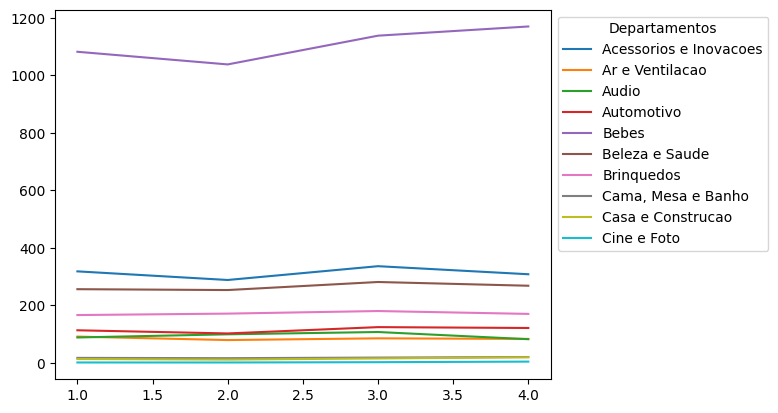

In [ ]:
vendas_correto['Mês'] = vendas_correto['Data'].dt.month
vendas_m_d = vendas_correto.groupby(['Mês','Nome_Departamento']).idcompra.nunique().reset_index()
departamentos = vendas_m_d['Nome_Departamento'].unique()[:10]
for dp in departamentos:
  dados = vendas_m_d[vendas_m_d['Nome_Departamento'] == dp]
  plt.plot(dados['Mês'], dados['idcompra'], label=dp)
plt.legend(title='Departamentos', bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
clientes = pd.read_excel('cliente_varejo.xlsx')
clientes.astype({
    'renda': 'float'
})
vendas_clientes = vendas_correto.merge(clientes, on='cliente_Log', how='left')

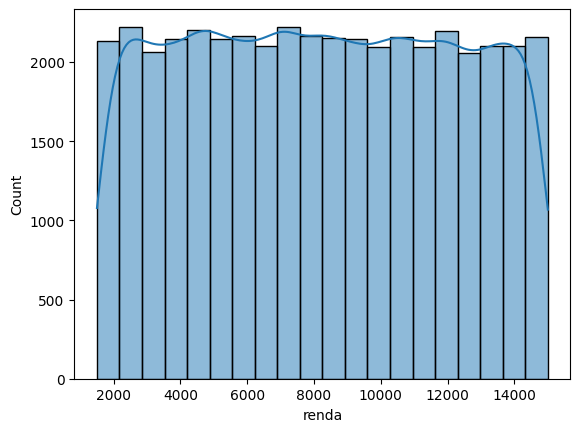

In [ ]:
sns.histplot(data=vendas_clientes, x='renda', bins=20, kde=True);

In [ ]:
px.box(vendas_clientes, x='renda')


In [ ]:
vendas_clientes[vendas_clientes['idcompra'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preço_bruto,Desconto,Preço_liquido,Porcentagem_desconto,Mês,idade,renda


In [ ]:
vendas_clientes.columns

Index(['idcompra', 'idcanalvenda', 'bandeira', 'Data', 'Preço_com_frete',
       'Nome_Departamento', 'estado', 'cliente_Log', 'Preço_bruto', 'Desconto',
       'Preço_liquido', 'Porcentagem_desconto', 'Mês', 'idade', 'renda'],
      dtype='object')

In [ ]:
vendas_clientes_ml = vendas_clientes.copy()

In [ ]:
vendas_clientes_ml['bandeira_a'] = vendas_clientes['bandeira'].apply(lambda x: 1 if x == 'A' else 0)
vendas_clientes_ml['bandeira_b'] = vendas_clientes['bandeira'].apply(lambda x: 1 if x == 'B' else 0)

In [ ]:
vendas_clientes_ml['idcanalvenda'] = vendas_clientes_ml['idcanalvenda'].str.replace('APP', 'Aplicativo')

In [ ]:
vendas_clientes_ml.head()

,idcompra,idcanalvenda,bandeira,Data,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Preço_bruto,Desconto,Preço_liquido,Porcentagem_desconto,Mês,idade,renda,bandeira_a,bandeira_b
0,437305,Mobile,A,2023-03-06,37.512,Bebes,SP,15478,35.92,10,27.512,26.66%,3,47,8258,1,0
1,455795,Mobile,B,2023-03-31,1785.112,Esporte e Lazer,RS,19790,1743.20,10,1775.112,0.56%,3,26,9207,0,1
2,455795,Mobile,B,2023-03-31,1785.112,Esporte e Lazer,RS,19790,1743.20,10,1775.112,0.56%,3,58,9204,0,1
3,455795,Mobile,B,2023-03-31,1785.112,Esporte e Lazer,RS,19790,1743.20,10,1775.112,0.56%,3,48,2796,0,1
4,75525,Mobile,B,2023-02-19,695.120,Moveis,SP,3442,679.20,10,685.120,1.44%,2,78,6596,0,1


In [ ]:
vendas_clientes_ml.columns

Index(['idcompra', 'idcanalvenda', 'bandeira', 'Data', 'Preço_com_frete',
       'Nome_Departamento', 'estado', 'cliente_Log', 'Preço_bruto', 'Desconto',
       'Preço_liquido', 'Porcentagem_desconto', 'Mês', 'idade', 'renda',
       'bandeira_a', 'bandeira_b'],
      dtype='object')

In [ ]:
x = vendas_clientes_ml[['bandeira_a', 'bandeira_b', 'Preço_bruto', 'renda']]
y = vendas_clientes_ml['Preço_liquido']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)
print(f'R quadrado: {r2_score(y_test, y_pred)}')

R quadrado: 0.9761939086319816


,A,B
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
42825,False,True
42826,False,True
42827,False,True
42828,False,True
